In [76]:
#Rupali Kakadia and Yeon Soo Choi
#Final Project
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set up the current directory
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Python_HW/

#DATA ACUISTION
#Data source from Kaggle
try:
    df = pd.read_csv('SuperMarket.csv')
except  Exception as e:
    print(f'An error occured:{e}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Python_HW


# INITIAL STORY and PURPOSE

#This dataset is from a supermarket store in Myanmar. The customer rating column is out of 10.
#Looking at the dataset, it seems that the supermarket is running on low margins of mere 4.76% where as the tax customers pay is 5%.
#We need to come up with business insights to help this low profit supermarket store get more sales so that they can increase margins and thus expand
#their overall business.


#On closely looking at the dataset, we find out that there are some incorrect column values. The tax 5% column states the tax paid  the customer on each purchase which goes to the govt.
#The cogs (Cost of Goods Sold) and Gross Income needs to be correctly calculated. The current cogs in the table is just Sales - Tax 5% which is pre tax sale and cannot be considered cogs.
#To get the cogs, we use the 4.761905 margin on each pre tax sale amount and then calculate the gross income as pre-tax sale - cogs.

In [77]:
#CLEANING DATA
#Renaming the columns
df.rename(columns={
    'Tax 5%': 'Tax revenue',  # Rename 'Tax 5%' to 'tax_revenue'
    'cogs': 'Sales',    # Rename 'cogs' to 'sales'
    'Sales': 'Total sales'     # Rename 'Sales' to 'TotalSales'
}, inplace=True)

#Dropping gross income column becuase it is incorrectly calculated.
df.drop(columns=['gross income'], inplace=True)

In [78]:
#CLEANING DATA
# Defining a function to calculate actual COGS and gross income based on the gross margin percentage and the pre tax sale value.
def calculate_cogs_and_gross_income(row):
    pre_tax_sale = row['Sales']  # The renamed 'pre_tax_sale' column
    gross_margin_percentage = row['gross margin percentage']

    # Calculate actual COGS
    actual_cogs = pre_tax_sale * (1 - gross_margin_percentage / 100)

    # Calculate gross income
    gross_income = pre_tax_sale - actual_cogs

    return pd.Series([actual_cogs, gross_income])

#Applying the function to each row in the DataFrame
df[['COGS', 'Gross income']] = df.apply(calculate_cogs_and_gross_income, axis=1)

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax revenue,Total sales,Date,Time,Payment,Sales,gross margin percentage,Rating,COGS,Gross income
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,9.1,497.933333,24.896667
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,9.6,72.761905,3.638095
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,7.4,308.866667,15.443333
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,8.4,443.580952,22.179048
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,5.3,575.400000,28.770000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax revenue              1000 non-null   float64
 9   Total sales              1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  Sales                    1000 non-null   float64
 14  gross margin percentage  

In [80]:
df.describe()

,Unit price,Quantity,Tax revenue,Total sales,Sales,gross margin percentage,Rating,COGS,Gross income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,6.97270,292.940362,14.647018
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,1.71858,223.025247,11.151262
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,4.00000,9.685714,0.484286
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.50000,112.854762,5.642738
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,7.00000,230.247619,11.512381
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,8.50000,427.528571,21.376429
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,10.00000,945.714286,47.285714


In [81]:
#To find any missing values
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax revenue,0
Total sales,0


In [82]:
#To find any duplicated values
df.duplicated().sum()

0

In [83]:
#To see the data set randomly
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax revenue,Total sales,Date,Time,Payment,Sales,gross margin percentage,Rating,COGS,Gross income
87,633-44-8566,Alex,Yangon,Member,Female,Food and beverages,49.38,7,17.283,362.943,3/27/2019,8:35:00 PM,Credit card,345.66,4.761905,7.3,329.200000,16.460000
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.592,33.432,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,7.7,30.323810,1.516190
907,851-98-3555,Cairo,Mandalay,Normal,Female,Health and beauty,82.88,5,20.720,435.120,3/24/2019,2:08:00 PM,Credit card,414.40,4.761905,6.6,394.666667,19.733333
569,408-26-9866,Giza,Naypyitaw,Normal,Female,Sports and travel,73.98,7,25.893,543.753,3/2/2019,4:42:00 PM,Ewallet,517.86,4.761905,4.1,493.200000,24.660000
191,437-58-8131,Cairo,Mandalay,Normal,Female,Fashion accessories,73.52,2,7.352,154.392,1/15/2019,1:41:00 PM,Ewallet,147.04,4.761905,4.6,140.038095,7.001905


In [84]:
#Also, we will remove the white space of column name and replace with underbar
df.columns = df.columns.str.replace(' ', '_')

In [85]:
#We do not handle outliers since we think every customer datapoint carries meaningful information relevant to our analysis in this case.
#To see if there are any mixed values in each column, we will look over all categorical values with unique function
print(df.nunique())
print(f'Branch: ', df['Branch'].unique())
print(f'City: ', df['City'].unique())
print(f'Customer type: ', df['Customer_type'].unique())
print(f'Gender: ', df['Gender'].unique())
print(f'Product line: ', df['Product_line'].unique())
print(f'Payment: ', df['Payment'].unique())

#Based on the result, there is no need to clean the dataset anymore.

Invoice_ID                 1000
Branch                        3
City                          3
Customer_type                 2
Gender                        2
Product_line                  6
Unit_price                  943
Quantity                     10
Tax_revenue                 990
Total_sales                 990
Date                         89
Time                        506
Payment                       3
Sales                       990
gross_margin_percentage       1
Rating                       61
COGS                        990
Gross_income                990
dtype: int64
Branch:  ['Alex' 'Giza' 'Cairo']
City:  ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type:  ['Member' 'Normal']
Gender:  ['Female' 'Male']
Product line:  ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Payment:  ['Ewallet' 'Cash' 'Credit card']


In [86]:
#Exploratory Data Analysis (EDA)

#Descriptive Statistics
df.describe()

#Because of same gross margin percentage in this supermarket, the statistic is not meanigful for column gross margin percentage
#Otherwise, for unit price, the range of unit price is 10.08 to 99.96. The average unit price is 55.67 and median of unit price is 55.23 which indicate that the values in this column might show symmetric distribution.
#For quanitty, the range of quantity is 1 to 10. The average quantity is 5.51 and median of quantity is 5 which indicate that the values in this column might show symmetric distribution.
#For tax revenue, the range of tax revenue  is 0.53 to 49.65. The average tax is 15.38 but the median of tax value is 12.09 which often indicate that the values in this column might show right skewed distribution.
#For sales, the range of total sales is 10.68 to 1042.65. The average total sales is 322.97 but the median of total sales is 253.85 which often indicate that the values in this column night show right skewed distribtuion.
#The distribution of cogs and gross income might show right skewed distrubution as total sales and tax revenue column
#The distribution of ratings migh show symmetric distribution as quantity and unit price.
#We see that the customer satisfaction rating ranges from 4 to 10 so no customer has given a rating below 4 which is good.

,Unit_price,Quantity,Tax_revenue,Total_sales,Sales,gross_margin_percentage,Rating,COGS,Gross_income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,6.97270,292.940362,14.647018
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,1.71858,223.025247,11.151262
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,4.00000,9.685714,0.484286
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.50000,112.854762,5.642738
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,7.00000,230.247619,11.512381
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,8.50000,427.528571,21.376429
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,10.00000,945.714286,47.285714


In [87]:
# With descsribe funciton, we were not able to get the mode, so we will do it individually.
# However, distinct values like Invoice ID and columns like time, date, gross margin percentage, and so on, will not be calculated.

print(f'The mode of Branch: ', df['Branch'].mode()[0])
print(f'The mode of City: ', df['City'].mode()[0])
print(f'The mode of Customer type: ', df['Customer_type'].mode()[0])
print(f'The mode of Gender: ', df['Gender'].mode()[0])
print(f'The mode of Product line: ', df['Product_line'].mode()[0])
print(f'The mode of Unit price: ', df['Unit_price'].mode()[0])
print(f'The mode of Quantity: ', df['Quantity'].mode()[0])
print(f'The mode of Payment: ', df['Payment'].mode()[0])
print(f'The mode of Rating: ', df['Rating'].mode()[0])

#The results shows, members buy more than normal people, and female comes market more than male. Interestingly, the most popular product line that is sold is fashion accessories.
#When customers come to buy stuff, they pay with Ewallet.

The mode of Branch:  Alex
The mode of City:  Yangon
The mode of Customer type:  Member
The mode of Gender:  Female
The mode of Product line:  Fashion accessories
The mode of Unit price:  83.77
The mode of Quantity:  10
The mode of Payment:  Ewallet
The mode of Rating:  6.0


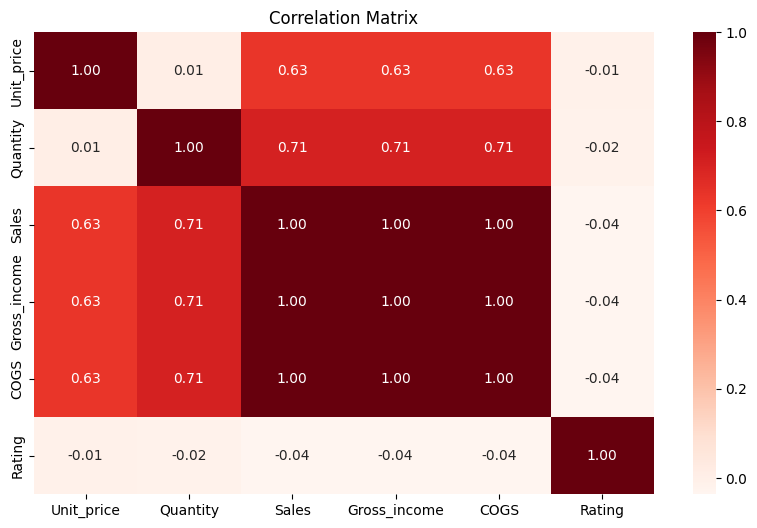

In [88]:
#Calculate correlation matrix
correlation_matrix = df[['Unit_price', 'Quantity', 'Sales', 'Gross_income', 'COGS', 'Rating']].corr()

#Visualizing the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#Correlation matrix shows nothing unusual. There is a strong relationship between sales and gross income and cogs as there should be.

In [89]:
df.head(2)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_revenue,Total_sales,Date,Time,Payment,Sales,gross_margin_percentage,Rating,COGS,Gross_income
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,9.1,497.933333,24.896667
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,9.6,72.761905,3.638095


# Product & Sales Analysis

In [53]:
# Initial analysis on finding Sales above average
average_sales = np.mean(df['Sales'].values)  #using numpy to get mean sales.
above_average_sales_count = np.sum(df['Sales'].values > average_sales)

print(f'Number of Transactions with Sales Above Average: {above_average_sales_count}')

#Business Insights:
#If 404 out of 1000 transactions are contributing the most to sales, then it means that 40% of the sales are high value and contributing the most to overall revenue.
# We need to figure out which type of customers and what product lines are driving those higher value sales to focus on those customer groups and product
#lines to increase sales.

#Lets figure that out!

Number of Transactions with Sales Above Average: 404


In [90]:
# Define total sales
total_sales = df['Sales'].sum()

# Total sales by product line
product_line_sales = df.groupby('Product_line')['Sales'].sum()

# Contribution to total sales
sales_contribution = (product_line_sales / total_sales) * 100

# Display results
for line, contribution in sales_contribution.items():
    print(f'Product Line: {line}, Sales Contribution: {contribution:.2f}%')

#Here, we see that Food and Beverages is contributing the most to Sales. Let visualize this!

Product Line: Electronic accessories, Sales Contribution: 16.82%
Product Line: Fashion accessories, Sales Contribution: 16.81%
Product Line: Food and beverages, Sales Contribution: 17.38%
Product Line: Health and beauty, Sales Contribution: 15.23%
Product Line: Home and lifestyle, Sales Contribution: 16.68%
Product Line: Sports and travel, Sales Contribution: 17.07%


             Product_line     Sales  Gross_income  Quantity
0  Electronic accessories  51750.03   2464.287143       971
1     Fashion accessories  51719.90   2462.852381       902
2      Food and beverages  53471.28   2546.251429       952
3       Health and beauty  46851.18   2231.008571       854
4      Home and lifestyle  51297.06   2442.717143       911
5       Sports and travel  52497.93   2499.901429       920


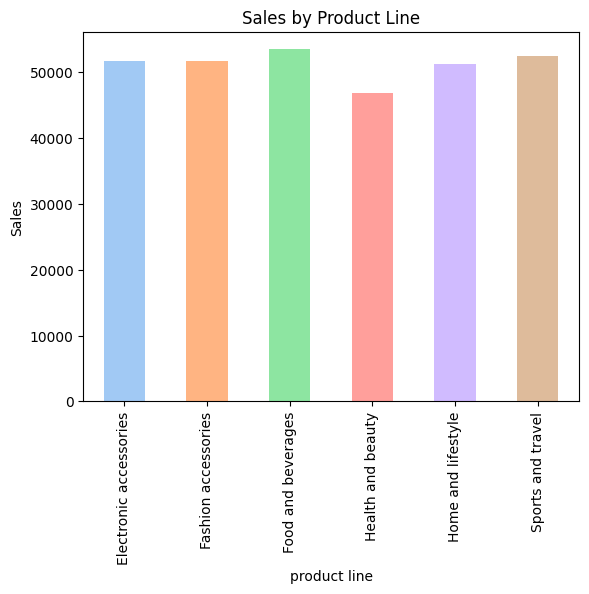

In [91]:
# Sales by product line
# Grouping by product line and calculating sales, gross income, and quantity
product_line_performance = df.groupby('Product_line').agg({
    'Sales': 'sum',
    'Gross_income': 'sum',
    'Quantity': 'sum',
}).reset_index()

# Display results
print(product_line_performance)

colors = sns.color_palette('pastel')

# Visualize total sales by product line
product_line_performance.plot(kind='bar', x='Product_line', y='Sales', title='Sales by Product Line', legend=False, color=colors)
plt.ylabel('Sales')
plt.xlabel('product line')
plt.show()

#We see that the product line with most sales is food and beverages and the product line with least sales is Health & Beauty. We could consider lowering or
#the halting the amount of health & beauty products we order from our supplier becuase it seems that they havent been sold much hence we have a lot of them in stock.
#Hence, to increase the sales of health and beauty products, we can encourage some sales promotion in store. For eg- discounts on women's day. We could cut margins on health
#beauty and simultaneously increase margins on food and beverages as they are necessary goods and more in demand.

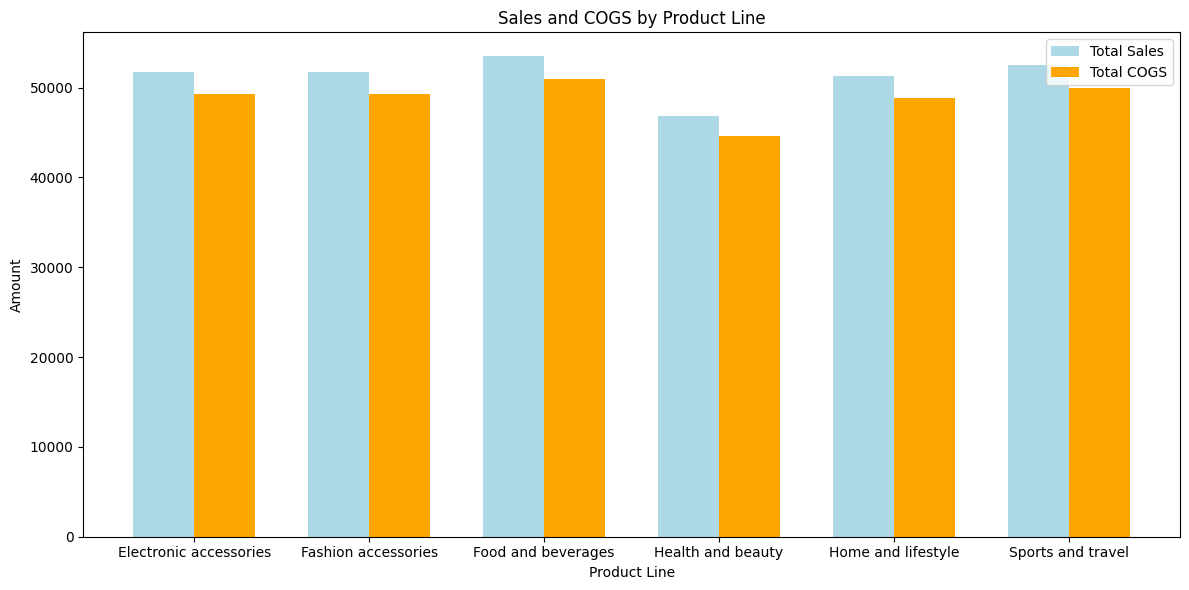

In [92]:
#COGS analysis (Cost of Goods Sold)
#Doing a COGS analysis to make sure that products dont have a higher cogs than their sales.
# High COGS compared to sales may indicate lower profitability for that product line, suggesting a need for price adjustments.

#Defining product line analysis
product_line_analysis = df.groupby('Product_line').agg(
    total_sales=('Sales', 'sum'),
    total_cogs=('COGS', 'sum')
).reset_index()

#Constructing a bar chart again for categorical variable: Product Line
# side-by-side bar chart for total sales and COGS by product line
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(product_line_analysis))

# Plotting Sales
plt.bar(index, product_line_analysis['total_sales'], bar_width, label='Total Sales', color='lightblue')
# Plotting COGS next to Sales
plt.bar([i + bar_width for i in index], product_line_analysis['total_cogs'], bar_width, label='Total COGS', color='orange')
plt.xlabel('Product Line')
plt.ylabel('Amount')
plt.title('Sales and COGS by Product Line')
plt.xticks([i + bar_width / 2 for i in index], product_line_analysis['Product_line'])
plt.legend()
plt.tight_layout()
plt.show()

#The COGS and sales relationship for each product line seems pretty reasonable, so we're good to proceed!

# Gender Analysis

Gender
Female    571
Male      429
Name: Gender, dtype: int64


([<matplotlib.patches.Wedge at 0x7c5cc36e1b10>,
 [Text(-0.26544963771808383, 1.1702719725924136, 'Female'),
  Text(0.24332873413687045, -1.0727493309917973, 'Male')])

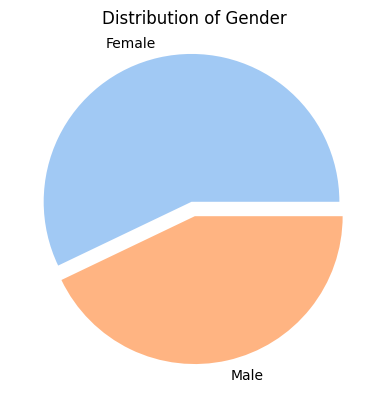

In [93]:
#Gender Distribution
#Hypothesis 1: There will be more female consumers than male consumers
count_type = df.groupby('Gender')['Gender'].count()
print(count_type)

#Visualize distribution of content types by using pie chart
explode = (0.1, 0)
colors = sns.color_palette('pastel')
plt.title('Distribution of Gender')
plt.pie(count_type, labels=count_type.index, explode= explode, colors= colors)

#The distribution of gender in pie chart shows that this supermarket has more female consumers than male consumers in 2019 Jan to March.
#So, our hypothesis is supported.
#As many female consumers do shopping more than male consumers, we can develop marketing campaigns that specifically target female shopper.
#For example, promotions around mother’s day specials, or female-centric holiday sales.

In [94]:
customer_type_sales = df.groupby('Customer_type')['Sales'].sum().reset_index()
print(customer_type_sales)
#Member sales are higher

  Customer_type      Sales
0        Member  180661.68
1        Normal  126925.70


In [95]:
gender_sales = df.groupby('Gender')['Sales'].sum().reset_index()
print(gender_sales)
#Female customers give more sales.

   Gender      Sales
0  Female  185401.75
1    Male  122185.63


Female count of each product line:  Product_line
Fashion accessories       108
Sports and travel         103
Food and beverages         98
Electronic accessories     94
Home and lifestyle         91
Health and beauty          77
Name: count, dtype: int64
Male count of each product line:  Product_line
Food and beverages        76
Electronic accessories    76
Health and beauty         75
Fashion accessories       70
Home and lifestyle        69
Sports and travel         63
Name: count, dtype: int64


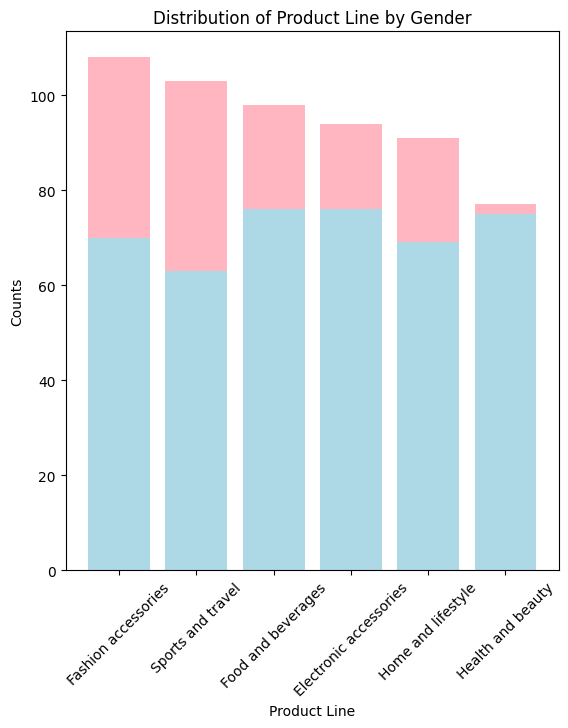

In [96]:
# Distribution of Product Line by Gender
#Hypothesis2a: Female consumers buy more fashion accessories products than male consumers.
#Hypothesis2b: Male consumers buy more sports and travel products than female consumers.

#To filter by gender
female = df[df['Gender'] == 'Female']
male = df[df['Gender'] == 'Male']

#To count purchases by product line for gender
count_female = female['Product_line'].value_counts()
count_male = male['Product_line'].value_counts()

print(f'Female count of each product line: ', count_female)
print(f'Male count of each product line: ', count_male)

#Visulization
plt.figure(figsize=(14, 7))

#To put two different bar graph in a single figure,
plt.subplot(1, 2, 1)
plt.bar(count_female.index, count_female.values, color='lightpink')
plt.title('Distribution of Product Line by Females')
plt.xlabel('Product Line')
plt.ylabel('Counts')

#To put two differen bar graph in a single figure,
plt.bar(count_male.index, count_male.values, color='lightblue')
plt.title('Distribution of Product Line by Gender')
plt.xlabel('Product Line')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.show()

#Based on the result, we supported H2a, but failed to support H2b.
#Female consumers buy fashion accessories much more than male consumers.
#However, Male consumers didn't buy sports and travel products more than female consumers.
#Follwoing this result, this supermarket can enhance marketing efforts towards male consumers for sports and travel products or electronic accessories
#which can boost the men's sales.

  Customer_type  Gender      Sales  Quantity  Transactions  \
0        Member  Female  119243.94      2079           356   
1        Member    Male   61417.74      1102           209   
2        Normal  Female   66157.81      1209           215   
3        Normal    Male   60767.89      1120           220   

   Avg Sale per Transaction  
0                334.954888  
1                293.864785  
2                307.710744  
3                276.217682  


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


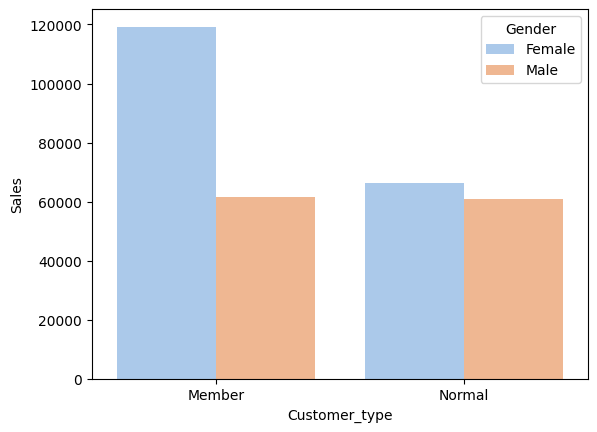

In [97]:
# Grouping by Customer Type and Gender to calculate total sales and average sales per transaction
customer_segment_sales = df.groupby(['Customer_type', 'Gender']).agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Invoice_ID': 'count'
}).rename(columns={'Invoice_ID': 'Transactions'}).reset_index()

# Now we will calculate average sales per transaction for each group
customer_segment_sales['Avg Sale per Transaction'] = customer_segment_sales['Sales'] / customer_segment_sales['Transactions']
print(customer_segment_sales)

# Visualizing it
sns.barplot(x='Customer_type', y='Sales', hue='Gender', data=customer_segment_sales, palette='pastel')
plt.ylabel('Sales')
plt.show()


Membership sales have always been higher in both males and females.
This is due to loyalty rewards that induce members to come back compared to non-member.This tells us that we need to strategise ways promote store membership to customers so that we can increase our sales because members are more likely to come back.
Female members dominate our customer base more than male members by a huge margin.
This tells us to tailor marketing towards female members as they comprise most of customer base.

#Suggestion:
We could start introduce a referral incentive where existing female members can gain more points for purchase by invite male friends or family to join the membership program. This way we can increase our membership to retain more sales and at the same time cater to male population.

#Quick Think
Our highest selling product line is Food & Beverages and females form most of our customer base. This suggests that women may prioritize food products, possibly due to roles in household purchasing and food preparation.

An absurd observation is that even though we have so many female customers, our lowest selling product line is Health and Beauty. This might be due to the fact that females dont prefer to buy health and beauty products from supermarket stores as they would much rather buy better quality ones from
established brands specifically for Beauty like Sephora and Ulta. Also, due to the intense competition, it might be difficult for our beauty products to stand out.

#Suggestion:
Since, the store is facing issues of low margins, they should focus on upselling their highest revenue product : Food , make money out of it and then use that revenue to introduce better quality beauty products and invest in catering to other market segments. For now, they should play to their strengths and increase margins on necessary items like food in cities and branches where customers are willing to pay (Giza  Naypyitaw) and establish a financial security to expand business.

Once the store has enough money, they could conduct market research to identify gaps in the health and beauty market and invest in natural beauty products to get some USP and also cater to male population.

#BRANCH ANALYSIS

  Branch       City  Gross_income  Quantity
0   Alex     Yangon   4816.343333      1859
1  Cairo   Mandalay   4816.220952      1820
2   Giza  Naypyitaw   5014.453810      1831


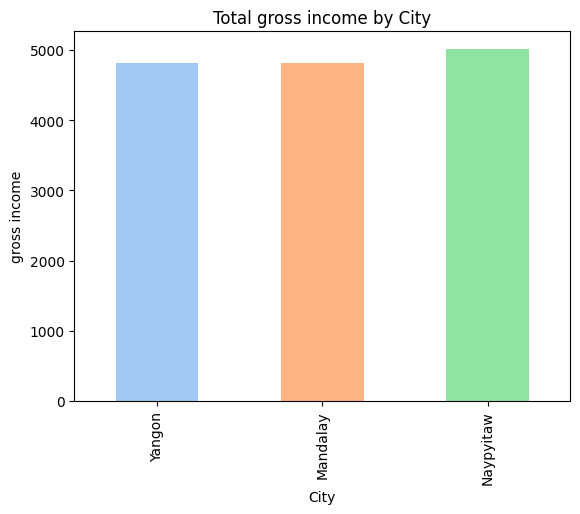

In [110]:
#BRANCH AND CITY ANALYSIS

#Using Bar Charts for this as well because branch and city are both categorical variables.

# Grouping by Branch and City to calculate total gross income and quantity sold
branch_city_sales = df.groupby(['Branch', 'City']).agg({
    'Gross_income': 'sum',
    'Quantity': 'sum'
}).reset_index()
print(branch_city_sales)

# Visualizing total sales by city
branch_city_sales.plot(kind='bar', x='City', y='Gross_income', title='Total gross income by City', legend=False, color=colors)
plt.ylabel('gross income')
plt.show()

#Business Insights
#The sales in all three cities is similar with the city of Naypyitaw having the highest sales and Mandalay contributing the lowest to total sales.
#This result also suggests something about the demographic of the cities. If Naypyitaw generates the highest gross income, then it means
# that the customers there are willing to spend.  it could be reasonable for the store to increase margins in branches in Naypyitaw
# specifically for the food and beverage product line as its a necessary item and also the highest demand.
#Also, the advertising should be targeted towards this high traffic cities. This city would also be a good location to target sale promotion
# the sale of our low sale product line : Health & Beauty as customers in this city are willing to spend. So its a good place to market the lowest and highest
#selling product lines.

  Branch       City  total_sales  total_transactions
0   Alex     Yangon    101143.21                 340
1  Cairo   Mandalay    101140.64                 332
2   Giza  Naypyitaw    105303.53                 328


<ipython-input-98-fb67d90c0a2b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='total_sales', data=branch_analysis, ax=ax1, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Whe

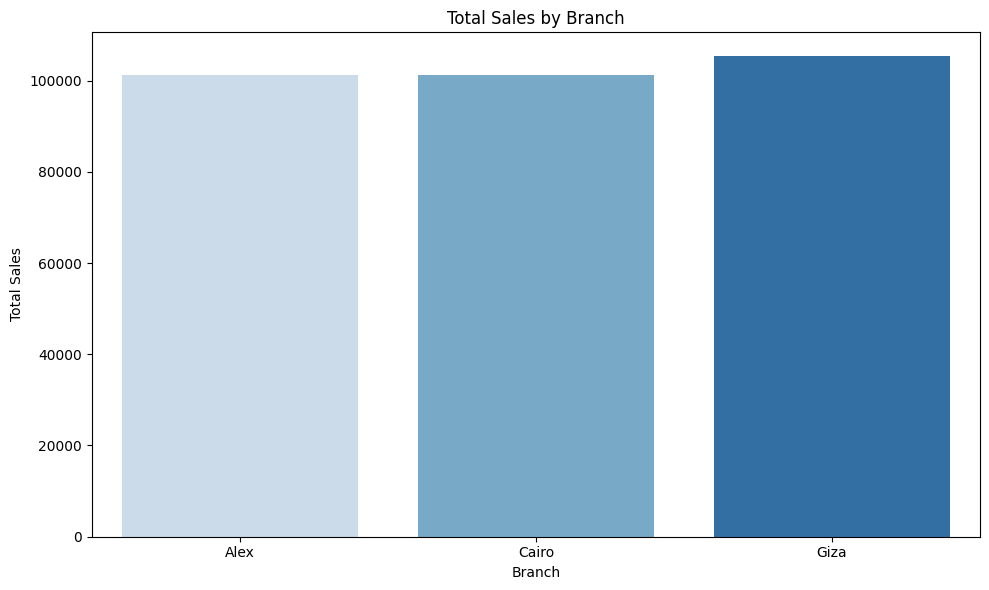

<ipython-input-98-fb67d90c0a2b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='total_transactions', data=branch_analysis, ax=ax2, palette='Greens')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWar

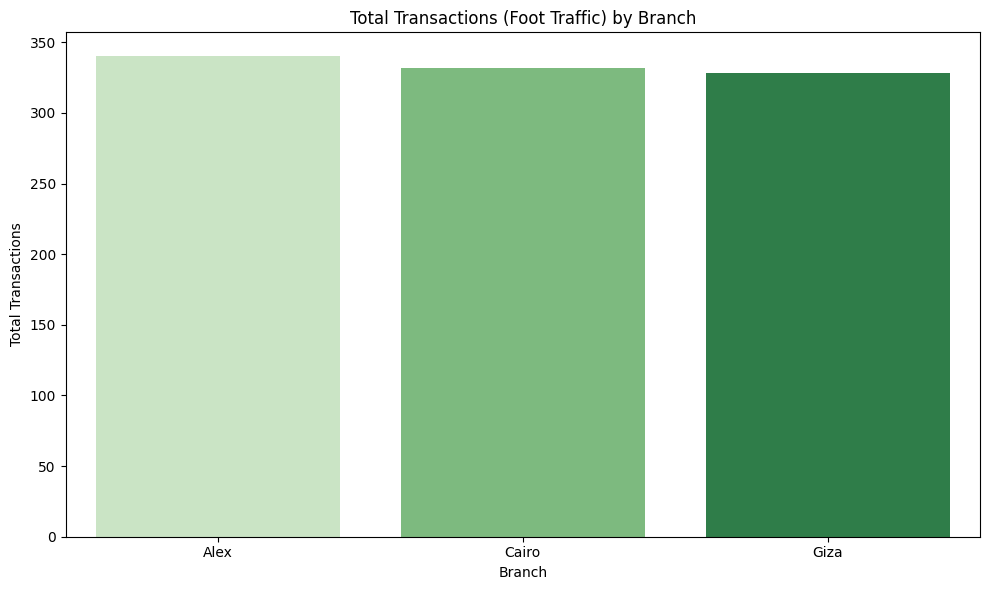

In [98]:
branch_analysis = df.groupby(['Branch', 'City']).agg(
    total_sales=('Sales', 'sum'),            # Sum of sales per branch
    total_transactions=('Invoice_ID', 'count')  # Count of transactions (foot traffic proxy)
).reset_index()
print(branch_analysis)

# Plotting the total sales and transactions per branch
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Branch', y='total_sales', data=branch_analysis, ax=ax1, palette='Blues')
ax1.set_title('Total Sales by Branch')
ax1.set_xlabel('Branch')
ax1.set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

# Plotting total transactions (foot traffic) per branch
fig, ax2 = plt.subplots(figsize=(10, 6))

sns.barplot(x='Branch', y='total_transactions', data=branch_analysis, ax=ax2, palette='Greens')
ax2.set_title('Total Transactions (Foot Traffic) by Branch')
ax2.set_xlabel('Branch')
ax2.set_ylabel('Total Transactions')

plt.tight_layout()
plt.show()

#Business Insights
#On analyzong the visualizations and the tables, we see that although the branch Alex has the highest foot traffic or transactions, the Giza branch
#triumphs on total sale value. This might be because although branch ALex has many customers coming in, the value of their total purchase is small while Giza has
#less customers coming in but they purchase a lot at once hence giving higher value. Hence, Naypyitaw which contains branch Goza has the highest sales.
#This gives us an idea of the demographic income of the two places.

#For branch Alex in the city of Yangon (High Foot Traffic, Low Purchase Value): we should focus more on offering discounts ncentivize repeat purchases and larger transactions.
#For branch Giza in the city of Naypyitaw  (Low Foot Traffic, High Purchase Value): we should highlight premium products and could increase margins on goods.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

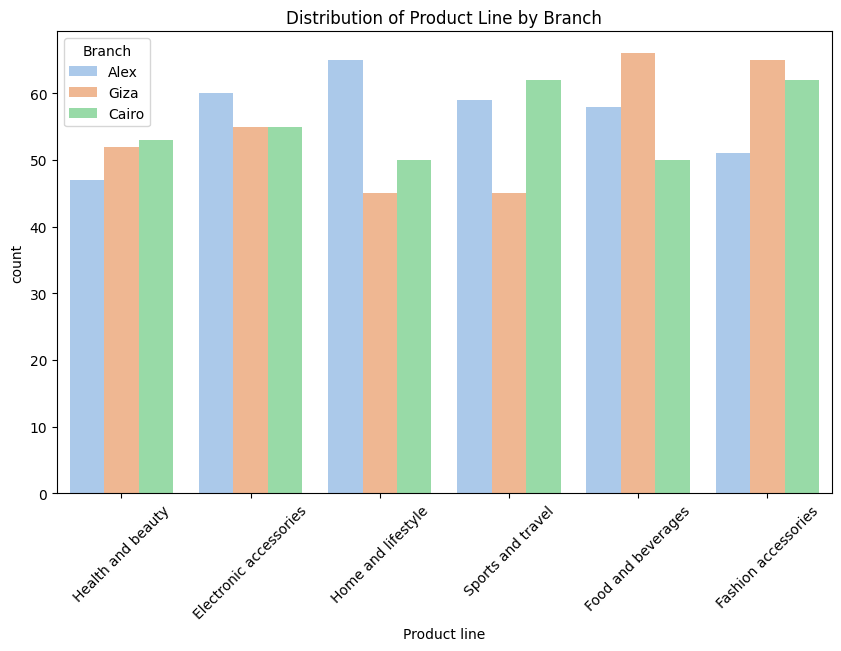

In [99]:
# Distribution of product line by branch
#We didn't have any information of each branch, so couldn't form the hypothesis in this case.
#To visualize the distribution of content ratings using a count plot
plt.figure(figsize = (10,6))
plt.title('Distribution of Product Line by Branch')
sns.countplot(x='Product_line', data = df, hue = 'Branch', palette='pastel')
plt.xlabel('Product line')
#to avoid xaxis overlapping
plt.xticks(rotation = 45)

#Depending on the Branch, popular product line seems different. Based on this results, each branch can execute different promotions.
#For example, Branch Alex shows the lowest selling in Healthy and beauty product, whereas home and lifestyle product has the highest selling.
#We can promote healthy and beauty product with bundled deals or offer a small discount on health and beauty prodcut
#when customers purchase a certain amount in the home and lifestyle category.

#TIME SERIES ANALYSIS

    Hour Day of Week    Sales
0     10      Friday  5401.61
1     10      Monday  3560.40
2     10    Saturday  3139.04
3     10      Sunday  3873.66
4     10    Thursday  6557.36
..   ...         ...      ...
72    20    Saturday  3033.40
73    20      Sunday  2282.44
74    20    Thursday  4309.75
75    20     Tuesday  3404.47
76    20   Wednesday  2650.32

[77 rows x 3 columns]


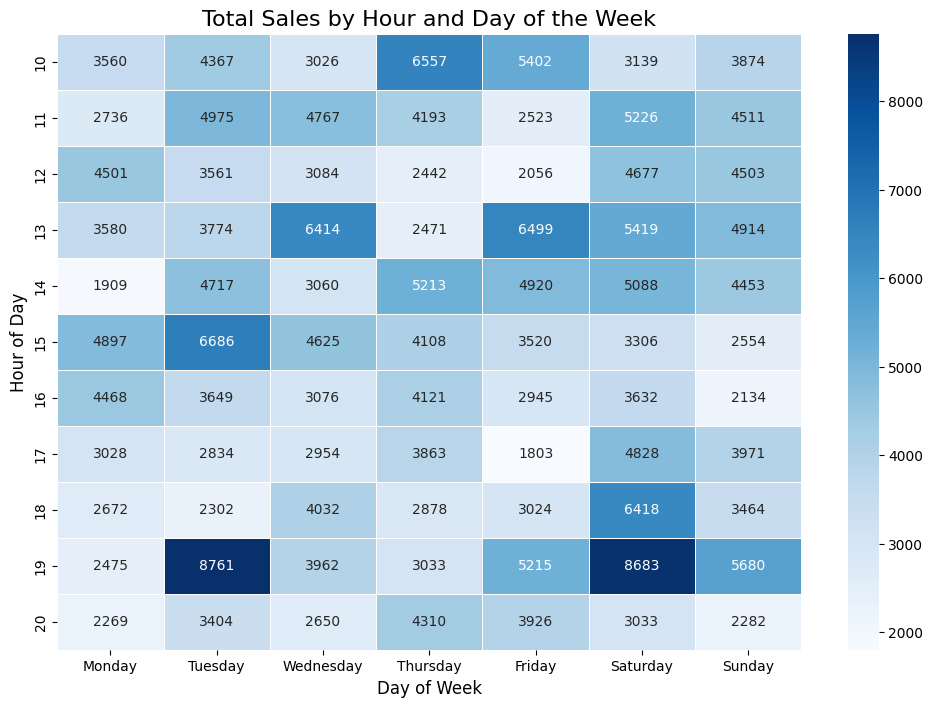

In [100]:
#using a heatmap to easily see which days and hours have the most traffic. Choosing a heatmap because it would be easy to extract information out of the visual.
# Distribution of total sales by hour and day of the week (Hour in military time).
# Convert Date and Time to datetime objects with the correct format for the time column including seconds
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')

# Extracting day of the week and hour from the Date and Time
df['Day of Week'] = df['Date'].dt.day_name()
df['Hour'] = df['Time'].dt.hour

# Defining the correct order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grouping the data by 'Hour' and 'Day of Week' and sum the Sales
df_group = df.groupby(['Hour', 'Day of Week'])['Sales'].sum().reset_index()

print(df_group)

# Creating a categorical type  which will help in sorting
df_group['Day of Week'] = pd.Categorical(df_group['Day of Week'], categories=day_order, ordered=True)

# Pivoting the data to have 'Hour' as rows and 'Day of Week' as columns and generating the heatmap.
sales_pivot = df_group.pivot(index='Hour', columns='Day of Week', values='Sales').reindex(columns=day_order)
plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, cmap='Blues', annot=True, fmt=".0f", linewidths=.5)
plt.title('Total Sales by Hour and Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.show()


#Business Insights
# Using a heatmap, we notice that Tuesday and Saturday evenings have the highest sales
#Action:  So we should ensure high-demand products (food) are well-stocked for these peak evenings to avoid stockouts and
# Ensure more staff is available during these peak times to handle the increased customer flow efficiently.
#We should also introduce promotions or discounts during slower periods to balance sales across the week.

#For eg: "Get 10% off your total purchase on Thursdays from 3 PM to 6 PM because thursdays is one of the days having the lowest sales during those
#times.


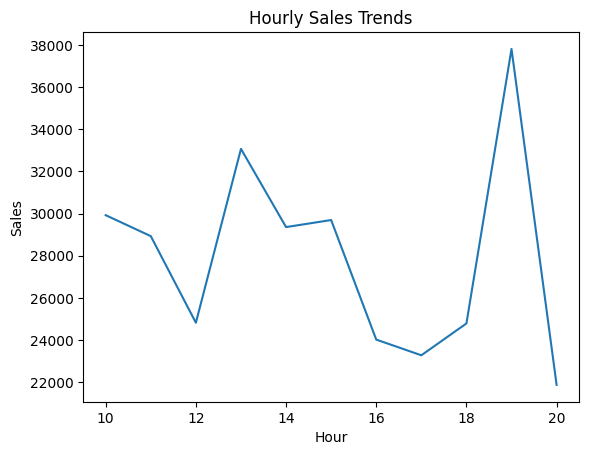

In [101]:
#HOURLY SALES ANALYSIS (in military time)
#Using a line chart because it is most uselful in analysis over time.
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()
sns.lineplot(data=hourly_sales, x='Hour', y='Sales')
plt.title('Hourly Sales Trends')
plt.show()

#Sales peak after 6pm probably because its the time females (most visited customers) visit stores to purchase 'Food' (our most sold item) to cook dinner
#for the family. And also, people want to get their essentials before store close.

#Suggestions: induce discounts by the hour to increase sales during the afternoon at 12pm.

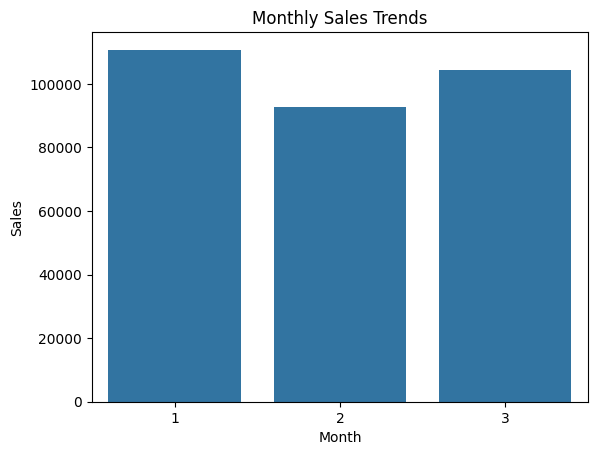

In [102]:
#MONTHLY SALES ANALYSIS
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
sns.barplot(data=monthly_sales, x='Month', y='Sales')
plt.title('Monthly Sales Trends')
plt.show()

#The first month: January had the highest sales. (data for these 3 months only).
#January may benefit from post-holiday shopping trends or New Year promotions, boosting sales. Thus, the store should focus making more
#marketing efforts in January to moetize higher demand.


<ipython-input-103-50dfb1bcdd8c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day of Week', y='Sales', data=daily_sales, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

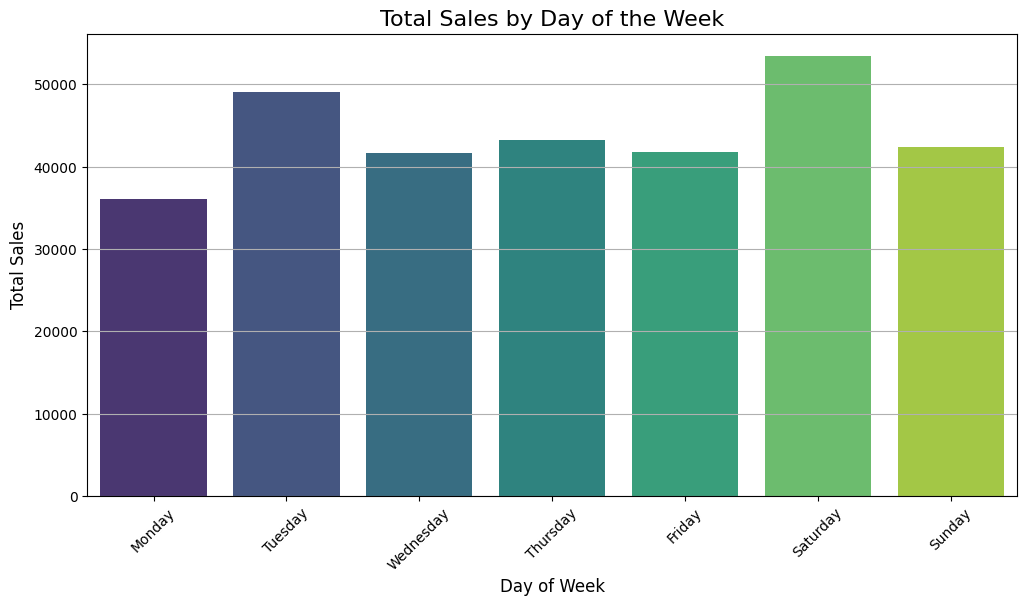

In [103]:
#WEEKLY SALES ANALYSIS
daily_sales = df.groupby('Day of Week').agg({'Sales': 'sum'}).reset_index()

# Ensure proper order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['Day of Week'] = pd.Categorical(daily_sales['Day of Week'], categories=days_order, ordered=True)
daily_sales = daily_sales.sort_values('Day of Week')

# Step 4: Visualize total sales by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='Day of Week', y='Sales', data=daily_sales, palette='viridis')
plt.title('Total Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#Business Insights :
# As noticed in the heatmap, we see that Tuesdays and Saturdays have the highest demand. Monday and Wednesdays have the lowest demand.
#Introduce discounts or special offers to drive traffic and improve sales during these slower days.
# for example: "Midweek Loyalty Discount (only for members): Spend $50 on Mondays or Wednesdays and get 10% off your next grocery purchase."
# Since we are running low on margins, this encourages customers to spend more per visit,
# while the discount applies to future purchases, encouraging repeat business without  cutting into margins.

#This type of promotion will help people sign up for membership, increase sales during low sale days and offering discounts on grocery items
# gurantees sales because it is our most in demand product. Thus, its a win - win.

<ipython-input-104-546e5efa262a>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')['Sales'].sum()


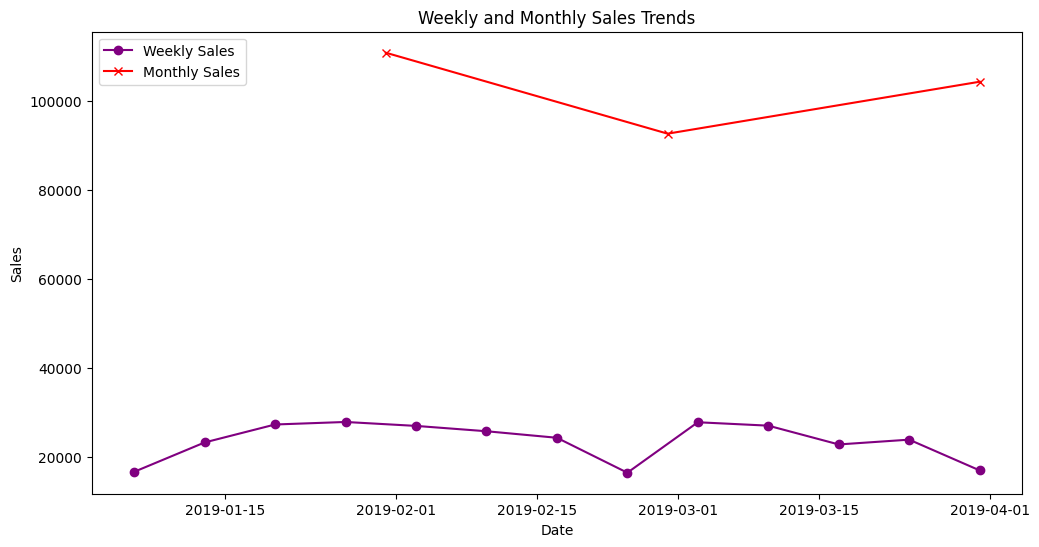

In [104]:
# Convert 'Date' to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Now let's perform the weekly and monthly resampling again
# Resample data to weekly sales
weekly_sales = df.resample('W')['Sales'].sum()

# Resample data to monthly sales
monthly_sales = df.resample('M')['Sales'].sum()

# Plot weekly and monthly sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Weekly Sales', color='purple', marker='o')
plt.plot(monthly_sales, label='Monthly Sales', color='red', marker='x')
plt.title('Weekly and Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#Business Insights : Stock Management

# Sales dipped during second month, gaing traction again in the third month. For the future, we can keep less stocks during February to account for this
# sales dip to avoid excess inventory and associated holding costs and stock up in January and March.


#PAYMENT METHOD ANALYSIS

       Payment      Sales  Transactions  Avg Sale per Transaction
0         Cash  106863.40           344                310.649419
1  Credit card   95968.64           311                308.580836
2      Ewallet  104755.34           345                303.638667


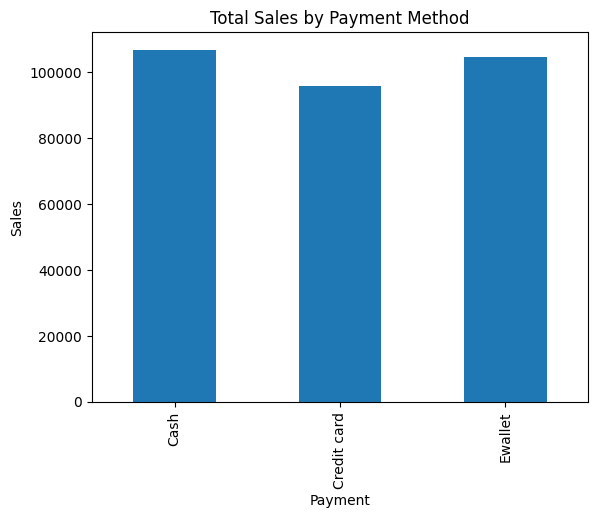

In [105]:
# Group by Payment method to calculate total sales and number of transactions
payment_method_sales = df.groupby('Payment').agg({
    'Sales': 'sum',
    'Invoice_ID': 'count'
}).rename(columns={'Invoice_ID': 'Transactions'}).reset_index()

# Calculating average sale per transaction for each payment method
payment_method_sales['Avg Sale per Transaction'] = payment_method_sales['Sales'] / payment_method_sales['Transactions']
print(payment_method_sales)

# Visualizing it using bar graph as its categorical.
payment_method_sales.plot(kind='bar', x='Payment', y='Sales', title='Total Sales by Payment Method', legend=False)
plt.ylabel('Sales')
plt.show()

#Business Insights:
#Most people are using cash as primary method followed by e wallet and lastly credit card.
# Cash Management (counting, depositing and securing) is risky and time consuming for the business. We can that there is e wallet growth potential
#thus we should promote the use of electronic payment methods by linking membership rewards in e wallets. Points can be stored in the e wallet if they pay
#electronically (like how Starbucks points are stored in the app). This will encourage a cashless system and less risk for the business.

#RATING ANALYSIS

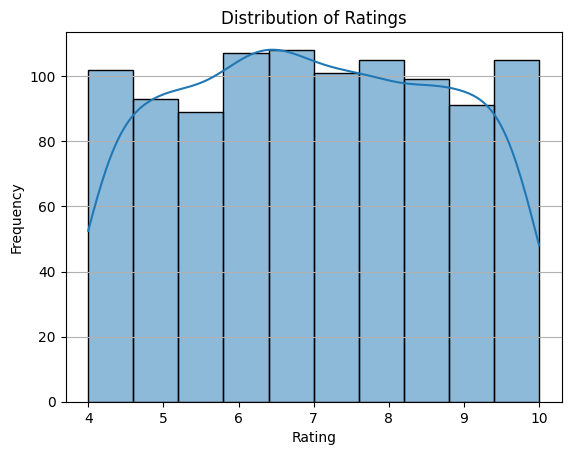

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


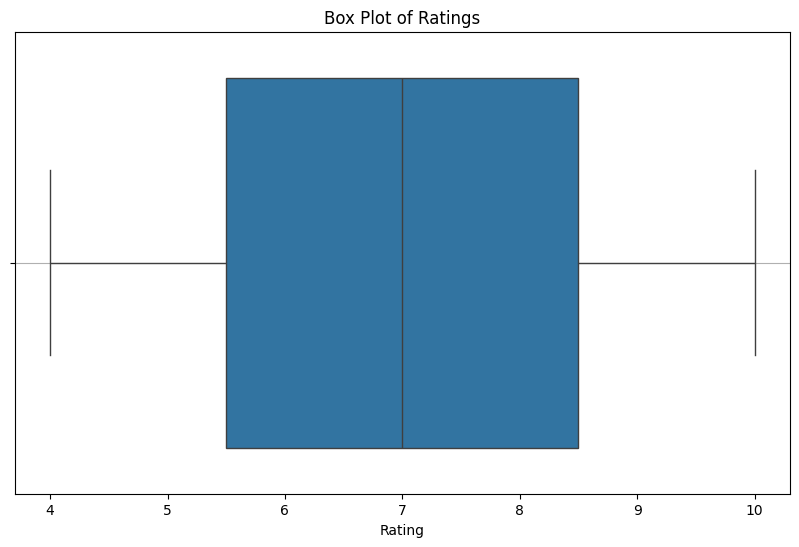

In [106]:
#RATING ANALYSIS (out of 10)
#using histogram because ratings are numerical and histograms are best for numerical variables.
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Box plot to see rating statistics as boxplots show min,median,quartiles, min, max, outliers  at a glance.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating'])
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')
plt.grid(axis='y')
plt.show()

#Business insights
#Histogram shows that the most frequent ratings are 6 and 7. Thus, there is a lot of scope for improvement for the store.
# 10 is the next highest rating followed by 4.
# Further we will dive into analyzing which transactions/products lead to a rating of 4 to 6.

#Median rating is 7.


In [107]:
#Checking the average rating for all product lines.

# Grouping by Product Line and calculating the average rating
product_line_rating = df.groupby('Product_line')['Rating'].mean().reset_index()

# Sorting the result
rating_product_lines = product_line_rating.sort_values(by='Rating')
print("Product Lines Average Ratings:")
print(rating_product_lines)


Product Lines Average Ratings:
             Product_line    Rating
4      Home and lifestyle  6.837500
5       Sports and travel  6.916265
0  Electronic accessories  6.924706
3       Health and beauty  7.003289
1     Fashion accessories  7.029213
2      Food and beverages  7.113218


In [108]:
#Check to see which product line has the highest low value rating.

# Filter the DataFrame for ratings in the range 4 to 6
filtered_ratings = df[(df['Rating'] >= 4) & (df['Rating'] <= 6)]

# Count the occurrences of each product line in this filtered set
product_line_count = filtered_ratings['Product_line'].value_counts().reset_index()

# Renaming the columns for clarity
product_line_count.columns = ['Product_line', 'Count']

# Sort the results in descending order to see the most common first
product_line_count = product_line_count.sort_values(by='Count', ascending=False)
print("Most Common Product Lines with Ratings Between 4 and 6:")
print(product_line_count)

#Business Insights
#Home and lifestyle has the lowest rating suggesting that consumers did not find satisfactory products in those sections when shopping for it.
#Most of our electronics items have had ratings between 4 and 6 The ratings for electronics (between 4 and 6) suggest a moderate level of customer satisfaction.
# there is room for improvement to enhance overall customer experience and encourage repeat purchases in these specific categories.
#Immediate action is needed to check and enhance the offerings in these categories specifically.

#Food and beverage has a higher ratings which suggests that consumers are happy with our food products so we can continue and strengthen our relationships with those
#food suppliers and purchase in bulk during high peak demand periods to get goods for cheaper and increase price for customer at the same time on them to increase profitability.

Most Common Product Lines with Ratings Between 4 and 6:
             Product_line  Count
0  Electronic accessories     60
1      Home and lifestyle     60
2     Fashion accessories     57
3       Sports and travel     55
4       Health and beauty     55
5      Food and beverages     54


# Summary & Recommendations
Action : Based on the data and the business insights listed below each code, we would recommend the business to monetize on its best selling product line like food and beverages for now, increase treasury and then develop other product lines. They should increase margins of the food and beverages product line in high income demographics cities like Naypyitaw and target promotions and discounts towards females. Promoting membership will also go a long way. They should also customize their product line based on the cities and the demand in that place. For eg: introducing fancier variations of the 'home and lifestyle' product line Alex but reducing the 'health and beauty' product line in Alex based on the product line by branch chart.

Our analysis has highlighted some key trends that point to actionable strategies for our supermarket. First, while food and beverages continue to perform strongly, our health and beauty products are not meeting expectations. To address this, we might consider scaling back our inventory in underperforming categories and introducing promotions or exclusive lines to reinvigorate interest.

We’ve also identified that Tuesday and Saturday evenings are peak times for customer traffic, likely driven by people preparing for meals and weekend activities. This insight suggests that we should optimize our staffing and stocking during these times to ensure we meet customer demand and avoid running out of popular items.

Additionally, introducing a referral program for our female members to bring in male customers as members could help expand and diversify our customer base, enhancing overall store loyalty. This will increase customer retention and help us cater to a different segment.

By strategically adjusting our inventory management, pricing, and promotional efforts in line with these insights, we can improve our supermarket’s performance.
Thus, a combination of all these analysis insights will help the supermarket achieve its initial goal: to increase margins (profits) and help the business make more revenue.